<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_beginner.png?raw=true' align='right' width=50>
***
# *Practicum AI:* Deep Learning - Resnet

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 1.01, page 7).

## Deep learning for image recognition

Before we dive into the details of how deep learning works, let's explore it through an example. In this exercise, we will use a pre-trained deep learning model, [ResNet50](https://arxiv.org/abs/1512.03385), which has been trained on [ImageNet](https://image-net.org/), a collection of about 1.3 million images labeled as being in one of 1,000 categories. 

To help with this exercise, let us introduce you to Amelia. <img alt='A GAN-generated cartoon image of Amelia, our character for this exercise.' src='images/amelia.png' align='right' width=300 style="float: right; padding: 10px 0px 0px 10px">

Amelia, our tech-geek, teenaged heroine, happens to be an extremely picky eater, who is a pizza fanatic 🍕. When dinner time rolls around, she only wants to come down from her bedroom if pizza is on the menu. 

Being a tech-geek, Amelia has installed a hidden camera in the dining room.  Once dinner is set, the camera snaps a photo of the meal.  Now, she wants to develop an AI image recognition system to determine if pizza is served or not.  

Let's help Amelia code her pizza recognition system!

As a side note, the drawing of Amelia was generated by a Generative Adversarial Network (GAN) trained on Anime images and created at: [https://thisanimedoesnotexist.ai/](https://thisanimedoesnotexist.ai/). To learn more about GANs, check out our [Practicum AI GAN learning experience](https://github.com/PracticumAI/gan).

#### 1. Import libraries

Import the necessary libraries. For this exercise, Amelia will use the pre-trained ResNet50 model that is part of Keras: `from tensorflow.keras.applications.resnet50 import ResNet50`. Check out the [Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50) for more details. 

In [1]:
# Load the supporting libraries...

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

# Import base tensorflow and set seed to achieve consistent results.
import tensorflow as tf 
import numpy as np

seed = 42  # Set the seed for reproducibility

tf.random.set_seed(seed)
np.random.seed(seed)

#### 2. Instantiate the Resnet50 model

Instantiate the Resnet50 model as a variable. This step creates the instance of the model to use.


#### <img src='images/tip_icon.svg' alt="Tip icon" width=40 align=center> Tip
>You will likely see some output highlighted in red. While red is used for errors, it is also used for warnings. It can take some getting used to, but red is OK in this case...

```python
mymodel = ResNet50()
```

In [3]:
# Code it!
mymodel = ResNet50()

2023-07-10 14:23:58.908832: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 14:23:59.409481: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79125 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0


102981632/102967424 [==============================] - 2s 0us/step


#### 3. Load image

Amelia has a test image of her favorite pizza to use to test the system. Let's load her pizza image in.

Since ResNet50 was trained using images that are 224X224 pixels, we need to transform the input image to be the same size.

### <img src='images/tip_icon.svg' alt="Tip icon" width=40 align=center> Tip

>The pizza image is stored in the images folder, the complete path of the location where the image is located must be given.
<br><br>
If running on Google Colab, you have a couple of choices:
Section 13: add !pip install gtts
> 1. Change the `'images/pizza.jpg'` to use the web location of the image in this repository: `'https://raw.githubusercontent.com/PracticumAI/deep_learning/main/images/pizza.jpg'`
> 2. Find any image of pizza, and upload it using the Files tab as in the image below. Then right click and "Copy path", and use that path.
<br>
<img src='images/colab_img_upload.png' alt='Screenshot of image upload for Google Colab'>
    

```python
myimage = load_img('images/pizza.jpg', target_size = (224, 224))
```


In [4]:
# Code it!
myimage = load_img('images/pizza.jpg', target_size = (224, 224))

#### 4. View the pizza image

Let's take a quick look at the image to verify that it's a pizza.  Type the variable name and run the code block.

```python
myimage
```

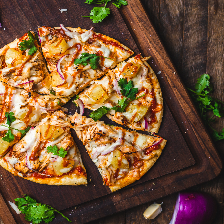

In [5]:
# Code it!
myimage

#### 5. Convert image to array

Convert the image to an array because the model expects it in this format.

```python
myimage = img_to_array(myimage)
```

In [6]:
# Code it!
myimage = img_to_array(myimage)

#### 6. Reshape image

Reshape the image.  All images fed to this model need to be 224 pixels high and 224 pixels wide, with 3 channels, one for each color (Red, Green, Blue).  If our image was greyscale, how many channels would we specify?

```python
myimage = myimage.reshape((1, 224, 224, 3))
```

In [7]:
# Code it!
myimage = myimage.reshape((1, 224, 224, 3))

#### 7. Pre-process image

Execute the *preprocess_image()* function with the image.

```python
myimage = preprocess_input(myimage)
```

In [8]:
# Code it!
myimage = preprocess_input(myimage)

#### 8. Execute predict method

Execute the model's predict method.

```python
myresult = mymodel.predict(myimage)
```

In [10]:
# Code it!
myresult = mymodel.predict(myimage)

#### 9. Get prediction label

The model's predict method returns a number.  Convert this to its corresponding text label.

```python
mylabel = decode_predictions(myresult)
```

In [13]:
# Code it!
mylabel = decode_predictions(myresult)

49152/35363 [=========================================] - 0s 0us/step


#### 10. Assign list item to variable 

Assign the first list item to a variable - this is the label with the highest probability.

```python
mylabel = mylabel[0][0]
```

In [14]:
# Code it!
mylabel = mylabel[0][0]

#### 11. Embed label 

Embed the label in a sentence and then print it.

```python
print("This is an image of a " + mylabel[1])
```

In [15]:
# Code it!
print("This is an image of a " + mylabel[1])                                        

This is an image of a pizza


### <img src='images/tip_icon.svg' alt="Tip icon" width=40 align=center> Tip

> Although we use an image of a pizza here, you can use just about any image with this model.  Continue on to step 16 where we define a function with all the steps. The <a href='https://raw.githubusercontent.com/PracticumAI/deep_learning/main/resnet_labels.txt'>resne> t_labels.txt</a> file lists all the images this model is trained to classify.

#### 12. Create a speech sentence

Create a longer sentence to convert to speech.

```python
sayit = "This is an image of a " + mylabel[1] + " in full living color."
```

In [18]:
# Code it!
sayit = "This is an image of a " + mylabel[1] + "in full living color."

#### 13. Import gtts libraries

Import the required libraries.  Google Text to Speech (gtts) is an open source cloud-based application programming interface (API).

In [19]:
from gtts import gTTS
import os

#### 14. Execute the gtts function

Pass the sayit variable to the gTTS API.

```python
myobj = gTTS(text = sayit)
```

In [20]:
# Code it!
myobj = gTTS(text = sayit)

#### 15. Save the audio file

Save the audio file.  The default location is the current directory.

```python
myobj.save("prediction.mp3")
```

In [21]:
# Code it!
myobj.save("prediction.mp3")

#### <img src='images/note_icon.svg' alt="Note icon" width=35 align=center> Note
> This last block of code will only work if you are running Jupyter Notebooks on a local computer.  Otherwise, download the .mp3 file from HiPerGator and listen to it on your computer.

In [ ]:
# Uncomment and run if running on local system
# os.system("prediction.mp3")

#### 16. Let's put it all together

We can put all of these steps together in a function to make it easier to test more images.

In [22]:
def whats_for_dinner(image):
    myimage = load_img(image, target_size = (224, 224))
    myimage = img_to_array(myimage)
    myimage = myimage.reshape((1, 224, 224, 3))
    myimage = preprocess_input(myimage)
    myresult = mymodel.predict(myimage)
    mylabel = decode_predictions(myresult)
    toplabel = mylabel[0][0]

    if toplabel[1] == 'pizza':
        sayit = "Amelia, tonight's dinner is " + toplabel[1] + ", let's go downstairs for dinner!"
    else:
        sayit = "Amelia, tonight's dinner is " + toplabel[1] + ", let's stay here and order a pizza!"

    myobj = gTTS(text = sayit)

    return mylabel, myobj

In [23]:
label, soundclip2 = whats_for_dinner('images/pizza2.jpg')
print(label)

soundclip2.save("prediction2.mp3")

[[('n07873807', 'pizza', 0.68715775), ('n07875152', 'potpie', 0.107296795), ('n07717410', 'acorn_squash', 0.05725695), ('n04476259', 'tray', 0.026459958), ('n07860988', 'dough', 0.02617824)]]


Amelia should test with non-pizza meals too to make sure her system is working. Let's try this burger. ![Photo of a hamburger](images/hamburger.jpg)

In [24]:
label, soundclip3 = whats_for_dinner('images/hamburger.jpg')
print(label)

soundclip3.save("prediction3.mp3")

[[('n07697313', 'cheeseburger', 0.76228094), ('n07579787', 'plate', 0.11257796), ('n07693725', 'bagel', 0.034482528), ('n07871810', 'meat_loaf', 0.023550568), ('n07614500', 'ice_cream', 0.007341866)]]


It looks like Amelia's classifier is working well as it predicted that the image was a cheeseburger. 

But Amelia's parents are on to her...they started making food that looks like pizza, but isn't! How about this quiche? Does it fool the AI? Can you find images that trick Amelia into coming down for dinner?

![A photo of quiche](images/quiche.jpg)

In [25]:
label, soundclip4 = whats_for_dinner('images/quiche.jpg')
print(label)

soundclip4.save("prediction4.mp3")

[[('n07873807', 'pizza', 0.29639563), ('n03400231', 'frying_pan', 0.19899914), ('n07717410', 'acorn_squash', 0.18515374), ('n07836838', 'chocolate_sauce', 0.120220855), ('n07614500', 'ice_cream', 0.054374497)]]
